<module 'preprocessing' from '/home/tonko22/PycharmProjects/npo_classification/preprocessing.py'>

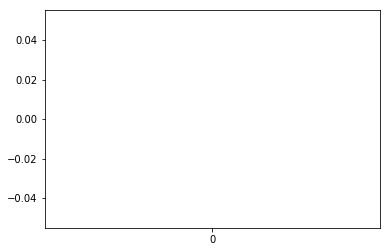

In [259]:
import imp
import pandas as pd
import numpy as np
import nltk

import parser
import preprocessing

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 100
imp.reload(parser)
imp.reload(preprocessing)
#nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger_ru')
# nltk.download('stopwords')

In [29]:
df = pd.read_pickle("np_ngo_classification_links.pkl")
print(len(df))
df

197


,Регион,Название организации,ИНН,Год регистрации,Адресс,Возможность пожертвовать деньги на сайте,Возможность обратиться за помощью,Ссылка на сайт,Вид деятельности 1,Вид деятельности 2,...,Вид деятельности 5,Вид деятельности 6,Вид деятельности 7,Вид деятельности 8,Вид деятельности 9,Вид деятельности 10,Вид деятельности 11,Вид деятельности 12,num_sites,web_text
0,Москва,"Межрегиональная общественная благотворительная организация ""Общество защиты прав потребителей и ...",5032173157,2007-07-12,"г Москва, Орехово-Борисово Южное р-н, МКАД 23-й км, д 6",0,0,http://greenstartup.ru/,3_2,6_1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,function set_cookie(){var now = new Date();var time = now.getTime();time += 19360000 * 1000;now....
1,Москва,"Межрегиональная благотворительная общественная организация инвалидов ""Общество пациентов с перви...",7702370774,2007-08-28,"г Москва, Мещанский р-н, ул Трифоновская, д 49, оф 41",1,1,http://oppid.ru/,2_1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.0 Transitional//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-tra..."
2,Москва,"Некоммерческая организация Благотворительный фонд ""Столица Милосердия""",7702472455,2014-02-11,"г Москва, Мещанский р-н, ул Щепкина, д 9 стр 1",1,1,capital-mercy.ru,1_9,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,html Благотворительный фонд Столица милосердия [if IE 6]>\n<link rel='stylesheet' type='text/css...
3,Москва,"Российский общественный благотворительный фонд ветеранов (пенсионеров) войны, труда и Вооруженны...",7704058560,1998-06-05,"г Москва, р-н Соколиная Гора, ул Щербаковская, д 50/52",1,1,http://www.rbfondveteranov.ru/,1_4,5_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.0 Strict//EN"" ""http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dt..."
4,Москва,"Благотворительный фонд ""Фонд Валерия Гергиева""",7709402778,2003-01-27,"г Москва, р-н Арбат, ул Молчановка Б., д 23 к 2",0,0,http://gergiev-charity.com/rus/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD HTML 4.01 Transitional//EN"" ""http://www.w3.org/TR/html4/loose.dtd"" Благ..."
5,Москва,Международный Благотворительный Фонд Владимира Спивакова,7710012370,1994-05-20,"г Москва, Пресненский р-н, Шведский тупик, д 3, оф 17",1,0,http://spivakov.ru/fund/contacts/,4_2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Контактная информация и реквизиты | Фонд Спивакова [if lt IE 9]>\n<script src=""http://spiva..."
6,Москва,"Благотворительный фонд поддержки детей с особенностями развития ""Я есть!""",7710479817,2012-05-02,"г Москва, Пресненский р-н, пер Кондратьевский Б., д 4 к 3, оф 29",1,1,http://yaest.ru/,1_7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Главная | Я есть <script src=""http://ajax.googleapis.com/ajax/libs/jquery/1.12.1/jquery.min..."
7,Москва,"Благотворительный фонд помощи бездомным животным ""Ковчег""",7716451494,2014-11-14,"г Москва, Ярославский р-н, Ярославское шоссе, д 2 к 1, кв 157",1,0,http://fond-kovcheg.ru,6_4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html Фонд «Ковчег» | Поможем вместе window._wpemojiSettings = {""baseUrl"":""http:\/\/s.w.org\/imag..."
8,Москва,Благотворительный фонд поддержки детей имени императрицы Александры Федоровны Романовой,7701064809,2011-03-22,"105082, ГОРОД МОСКВА, УЛИЦА ФРИДРИХА ЭНГЕЛЬСА, 75, СТР. 3, ОФ. № 1",1,1,http://www.vfonde.ru/,1_7,1_2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"html PUBLIC ""-//W3C//DTD XHTML 1.1//EN"" ""http://www.w3.org/TR/xhtml11/DTD/xhtml11.dtd"" Áëàãîòâîð..."
9,Москва,"Благотворительный Фонд ""Центр помощи беспризорным детям"" Торгово-промышленной палаты Российской ...",7701295193,2002-03-27,"101000, ГОРОД МОСКВА, БУЛЬВАР ЧИСТОПРУДНЫЙ, 5/10, С.1",1,1,http://www.tppdetfond.ru/,1_3,1_7,...,2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,html if(!window.BX)window.BX={};if(!window.BX.message)window.BX.message=function(mess){if(typeof...


In [3]:
pp = preprocessing.PreprocessingInterface()

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [30]:
pp = preprocessing.PreprocessingInterface()
df["text_normalized"] = df["web_text"].apply(pp.normalize)
df["text_padded"] = df["text_normalized"].apply(pp.pad_punctuation)
df["tokenized"] = df["text_padded"].apply(pp.razdel_tokenize)
df["no_punct"] = df["tokenized"].apply(pp.remove_punct)
df["text_no_stop"] = df["no_punct"].apply(pp.remove_stopwords)
df["preprocessed_tokens"] = df["text_no_stop"].apply(pp.remove_digits)

INFO pymorphy2.opencorpora_dict.wrapper __init__ Loading dictionaries from /home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/pymorphy2_dicts/data
INFO pymorphy2.opencorpora_dict.wrapper __init__ format: 2.4, revision: 393442, updated: 2015-01-17T16:03:56.586168


In [31]:
df["cyrillic_text"] = df["preprocessed_tokens"].apply(pp.filter_non_cyrillic)
df = df[df['cyrillic_text'].astype(str) != '[]']
df.dropna(subset=["cyrillic_text"], inplace=True)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
# df[df["cyrillic_text"].map(len)<15][["Ссылка на сайт", "cyrillic_text"]].to_pickle("broken_sites.pkl")
# df[df["cyrillic_text"].map(len)<15][["Ссылка на сайт", "cyrillic_text"]]

In [32]:
# Drop short texts
df = df[df["cyrillic_text"].map(len)>15]

In [597]:
# TODO: Drop empty tokens ""

In [35]:
def filter_tokens_by_len(tokenlist):
    return [t for t in tokenlist if len(t.strip())>1]

In [41]:
def show_short_ones(tokenlist):
    for t in tokenlist:
        if len(t.strip())<2:
            return t

In [44]:
df["lemmatized"] = df["cyrillic_text"].apply(pp.lemmatize_tokens_with_mystem)
df["lemmatized"].replace('', np.nan, inplace=True)
df["preprocessed_tokens"] = df["lemmatized"].apply(filter_tokens_by_len)
df["preprocessed_text"] = df["preprocessed_tokens"].apply(" ".join)
df.dropna(subset=["preprocessed_text"], inplace=True)
df = df[df['preprocessed_text'].astype(str) != '[]']

In [48]:
df = df.reset_index().drop("index", axis=1)

In [49]:
# !git commit -a -m "minor fix, new dataset"

In [249]:
# df.dropna(subset=["preprocessed_tokens"], inplace=True)
pp.stats_for_series(df["preprocessed_tokens"])

,Total tokens,Unique tokens,Total texts,Empty texts,Empty tokens
Count,126403,14357,176,0,592


In [51]:
df[["preprocessed_text", 
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
  ]].to_pickle("preprocessed_dataset.pkl")

In [246]:
df = pd.read_pickle("preprocessed_dataset.pkl")

In [252]:
df["preprocessed_tokens"] = df["preprocessed_text"].apply(lambda x: x.split(" "))
df["preprocessed_tokens"] = df["preprocessed_tokens"].apply(filter_tokens_by_len)

In [253]:
def extract_lv_1(category_string):
    if  isinstance(category_string, str):
        if category_string[0]==" ":
            return category_string[1]
        return category_string[0]

In [254]:
# Extracting only lvl 1 categories
target_cols = [
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]
for each in target_cols:
    df[each] = df[each].apply(extract_lv_1)

In [255]:
# Remove duplicates from rows
for index, row in df.iterrows():
    unique_row_values = list(set(row[1:-1]))
    vals = [e for e in unique_row_values if e!=None]
    while len(vals)<12:
        vals.append(None)
    row[1:-1] = vals

# wmd features

In [240]:
from gensim.models.wrappers import FastText
araneum_fasttext_3grams_path  = "/home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model"
araneum_fasttext_3grams = FastText.load(araneum_fasttext_3grams_path)

def update_model(sents, model):
    model.min_count = 1
    model.sample = 0
    model.build_vocab(sents, update=True)
    model.train(sents, total_examples=model.corpus_count, epochs=model.iter)
    return model

updated_embeddings = update_model(df["preprocessed_text"].apply(lambda x: x.split(" ")), araneum_fasttext_3grams)

INFO gensim.models.deprecated.old_saveload load loading FastText object from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model
DEBUG smart_open.smart_open_lib smart_open {'kw': {}, 'mode': 'rb', 'uri': '/home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model'}
DEBUG smart_open.smart_open_lib encoding_wrapper encoding_wrapper: {'errors': 'strict', 'encoding': None, 'mode': 'rb', 'fileobj': <_io.BufferedReader name='/home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model'>}
INFO gensim.models.deprecated.old_saveload _load_specials loading wv recursively from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model.wv.* with mmap=None
INFO gensim.utils _load_specials loading syn0_vocab from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model.wv.syn0_vocab.npy with mmap=None
INFO gensim.utils _load_specials loading syn0 from /home/tonko22/rusvectores/araneum_none_fasttextskipgram_300_5_2018.model.

INFO gensim.models.deprecated.word2vec train worker thread finished; awaiting finish of 25 more threads
DEBUG gensim.models.deprecated.word2vec worker_loop worker exiting, processed 1 jobs
INFO gensim.models.deprecated.word2vec train PROGRESS: at 12.22% examples, 18 words/s, in_qsize 24, out_qsize 1
INFO gensim.models.deprecated.word2vec train worker thread finished; awaiting finish of 24 more threads
DEBUG gensim.models.deprecated.word2vec worker_loop worker exiting, processed 1 jobs
INFO gensim.models.deprecated.word2vec train PROGRESS: at 13.35% examples, 25 words/s, in_qsize 23, out_qsize 1
INFO gensim.models.deprecated.word2vec train worker thread finished; awaiting finish of 23 more threads
DEBUG gensim.models.deprecated.word2vec worker_loop worker exiting, processed 1 jobs
INFO gensim.models.deprecated.word2vec train PROGRESS: at 19.89% examples, 31 words/s, in_qsize 22, out_qsize 1
INFO gensim.models.deprecated.word2vec train worker thread finished; awaiting finish of 22 more t

In [256]:
from collections import OrderedDict
labels_lv1_map = OrderedDict({
        "1": "социально уязвимые группы населения",
        "2": "медицина", 
        "3": "права человека",
        "4": "культура наука образование",
        "5": "чрезвычайные ситуации конфликты",
        "6": "экология человек природа",
        "7": "развитие гражданского общества",
        "8": "религия",
        "9": "образ жизни",
        "10": "иное"
    })

In [716]:
def compute_wmd(tokenlist):
    features = []
    for each in labels_lv1_map.values():
        wmd = araneum_fasttext_3grams.wmdistance(tokenlist, each.split(" "))
        features.append(wmd)
    return features

wmd = df["preprocessed_tokens"].apply(compute_wmd)

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(95 unique tokens: ['автор', 'англ', 'больной', 'буклет', 'валентина']...) from 2 documents (total 169 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(92 unique tokens: ['автор', 'англ', 'больной', 'буклет', 'валентина']...) from 2 documents (total 166 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(93 unique tokens: ['автор', 'англ', 'больной', 'буклет', 'валентина']...) from 2 documents (total 167 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Diction

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(223 unique tokens: ['актер', 'алферов', 'анастасия', 'артемий', 'берой']...) from 2 documents (total 314 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(222 unique tokens: ['актер', 'алферов', 'анастасия', 'артемий', 'берой']...) from 2 documents (total 313 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(345 unique tokens: ['алкоголик', 'баня', 'барри', 'бедный', 'бездомный']...) from 2 documents (total 476 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents buil

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(644 unique tokens: ['август', 'агитация', 'административный', 'администрация', 'адресат']...) from 2 documents (total 1663 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(644 unique tokens: ['август', 'агитация', 'административный', 'администрация', 'адресат']...) from 2 documents (total 1664 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(644 unique tokens: ['август', 'агитация', 'административный', 'администрация', 'адресат']...) from 2 documents (total 1663 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens:

INFO gensim.corpora.dictionary add_documents built Dictionary(185 unique tokens: ['адлерский', 'административный', 'акция', 'александр', 'альберт']...) from 2 documents (total 288 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(186 unique tokens: ['адлерский', 'административный', 'акция', 'александр', 'альберт']...) from 2 documents (total 288 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(184 unique tokens: ['адлерский', 'административный', 'акция', 'александр', 'альберт']...) from 2 documents (total 286 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(185 unique tokens: ['адлерский', 'административ

INFO gensim.corpora.dictionary add_documents built Dictionary(283 unique tokens: ['автокросс', 'автомобильный', 'адрес', 'актив', 'актуальный']...) from 2 documents (total 530 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(283 unique tokens: ['автокросс', 'автомобильный', 'адрес', 'актив', 'актуальный']...) from 2 documents (total 531 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(284 unique tokens: ['автокросс', 'автомобильный', 'адрес', 'актив', 'актуальный']...) from 2 documents (total 531 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(283 unique tokens: ['автокросс', 'автомобильный', 'адрес', 

INFO gensim.corpora.dictionary add_documents built Dictionary(167 unique tokens: ['адаптация', 'активность', 'алкоголизм', 'алкоголик', 'алкоголь']...) from 2 documents (total 448 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(164 unique tokens: ['адаптация', 'активность', 'алкоголизм', 'алкоголик', 'алкоголь']...) from 2 documents (total 445 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(165 unique tokens: ['адаптация', 'активность', 'алкоголизм', 'алкоголик', 'алкоголь']...) from 2 documents (total 446 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(166 unique tokens: ['адаптация', 'активность', 

INFO gensim.corpora.dictionary add_documents built Dictionary(112 unique tokens: ['альметьевск', 'арена', 'балтаси', 'благодарность', 'благотворительный']...) from 2 documents (total 202 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(111 unique tokens: ['альметьевск', 'арена', 'балтаси', 'благодарность', 'благотворительный']...) from 2 documents (total 201 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(814 unique tokens: ['абдуллин', 'август', 'автоматический', 'авторитет', 'аделин']...) from 2 documents (total 1885 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(812 unique tokens: ['абдуллин', 'ав

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(185 unique tokens: ['административный', 'администрация', 'адрес', 'акция', 'апрель']...) from 2 documents (total 267 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(183 unique tokens: ['административный', 'администрация', 'адрес', 'акция', 'апрель']...) from 2 documents (total 265 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(184 unique tokens: ['административный', 'администрация', 'адрес', 'акция', 'апрель']...) from 2 documents (total 266 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.c

INFO gensim.corpora.dictionary add_documents built Dictionary(176 unique tokens: ['абу', 'август', 'адаптация', 'аллах', 'аль']...) from 2 documents (total 313 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(175 unique tokens: ['абу', 'август', 'адаптация', 'аллах', 'аль']...) from 2 documents (total 313 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(176 unique tokens: ['абу', 'август', 'адаптация', 'аллах', 'аль']...) from 2 documents (total 313 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(174 unique tokens: ['абу', 'август', 'адаптация', 'аллах', 'аль']...) from 2 documents (total 311 corpus po

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(86 unique tokens: ['агенство', 'агро', 'агротуризм', 'ан', 'банный']...) from 2 documents (total 143 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(86 unique tokens: ['агенство', 'агро', 'агротуризм', 'ан', 'банный']...) from 2 documents (total 143 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(86 unique tokens: ['агенство', 'агро', 'агротуризм', 'ан', 'банный']...) from 2 documents (total 143 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(231 unique tokens: ['адрес', 'анастасия', 'анатольевна', 'анна', 'благо']...) from 2 documents (total 387 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(232 unique tokens: ['адрес', 'анастасия', 'анатольевна', 'анна', 'благо']...) from 2 documents (total 388 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(232 unique tokens: ['адрес', 'анастасия', 'анатольевна', 'анна', 'благо']...) from 2 documents (total 388 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents b

INFO gensim.corpora.dictionary add_documents built Dictionary(230 unique tokens: ['авг', 'акция', 'александр', 'александрович', 'алкоголизм']...) from 2 documents (total 480 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['авг', 'акция', 'александр', 'александрович', 'алкоголизм']...) from 2 documents (total 477 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(228 unique tokens: ['авг', 'акция', 'александр', 'александрович', 'алкоголизм']...) from 2 documents (total 478 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(229 unique tokens: ['авг', 'акция', 'александр', 'александрович',

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(112 unique tokens: ['август', 'адрес', 'академия', 'анонс', 'арев']...) from 2 documents (total 206 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(228 unique tokens: ['агент', 'агентство', 'активист', 'активный', 'акция']...) from 2 documents (total 360 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(225 unique tokens: ['агент', 'агентство', 'активист', 'активный', 'акция']...) from 2 documents (total 357 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(216 unique tokens: ['автомобиль', 'активно', 'аутист', 'база', 'балерина']...) from 2 documents (total 348 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(215 unique tokens: ['автомобиль', 'активно', 'аутист', 'база', 'балерина']...) from 2 documents (total 347 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(101 unique tokens: ['адресный', 'алиса', 'банк', 'бик', 'благотворительный']...) from 2 documents (total 189 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_docume

INFO gensim.corpora.dictionary add_documents built Dictionary(172 unique tokens: ['акция', 'аппарат', 'безразличный', 'благодарность', 'благотворительный']...) from 2 documents (total 310 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(171 unique tokens: ['акция', 'аппарат', 'безразличный', 'благодарность', 'благотворительный']...) from 2 documents (total 308 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(172 unique tokens: ['акция', 'аппарат', 'безразличный', 'благодарность', 'благотворительный']...) from 2 documents (total 309 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(171 unique tokens: ['ак

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(81 unique tokens: ['артист', 'аутизм', 'безвозмездный', 'бескорыстный', 'благотворитель']...) from 2 documents (total 120 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(81 unique tokens: ['артист', 'аутизм', 'безвозмездный', 'бескорыстный', 'благотворитель']...) from 2 documents (total 120 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(79 unique tokens: ['артист', 'аутизм', 'безвозмездный', 'бескорыстный', 'благотворитель']...) from 2 documents (total 118 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: []

INFO gensim.corpora.dictionary add_documents built Dictionary(103 unique tokens: ['адрес', 'аодкб', 'аробо', 'архангельский', 'база']...) from 2 documents (total 142 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(103 unique tokens: ['адрес', 'аодкб', 'аробо', 'архангельский', 'база']...) from 2 documents (total 142 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(103 unique tokens: ['адрес', 'аодкб', 'аробо', 'архангельский', 'база']...) from 2 documents (total 142 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(103 unique tokens: ['адрес', 'аодкб', 'аробо', 'архангельский', 'база']...) from 2 docume

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(149 unique tokens: ['автомобиль', 'айта', 'акция', 'арсений', 'банковский']...) from 2 documents (total 235 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(150 unique tokens: ['автомобиль', 'айта', 'акция', 'арсений', 'банковский']...) from 2 documents (total 236 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(150 unique tokens: ['автомобиль', 'айта', 'акция', 'арсений', 'банковский']...) from 2 documents (total 236 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_docum

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(450 unique tokens: ['аварийный', 'авиабилет', 'администрация', 'аксенов', 'активист']...) from 2 documents (total 718 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(448 unique tokens: ['аварийный', 'авиабилет', 'администрация', 'аксенов', 'активист']...) from 2 documents (total 715 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(449 unique tokens: ['аварийный', 'авиабилет', 'администрация', 'аксенов', 'активист']...) from 2 documents (total 716 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensi

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(275 unique tokens: ['август', 'акварельный', 'акцентировать', 'альбом', 'бачатский']...) from 2 documents (total 400 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(274 unique tokens: ['август', 'акварельный', 'акцентировать', 'альбом', 'бачатский']...) from 2 documents (total 399 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(156 unique tokens: ['август', 'адаптация', 'алкоголизм', 'алкоголик', 'алкоголь']...) from 2 documents (total 264 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corp

INFO gensim.corpora.dictionary add_documents built Dictionary(256 unique tokens: ['абонент', 'автомобиль', 'адрес', 'алажилль', 'алена']...) from 2 documents (total 423 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(254 unique tokens: ['абонент', 'автомобиль', 'адрес', 'алажилль', 'алена']...) from 2 documents (total 421 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(255 unique tokens: ['абонент', 'автомобиль', 'адрес', 'алажилль', 'алена']...) from 2 documents (total 422 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(254 unique tokens: ['абонент', 'автомобиль', 'адрес', 'алажилль', 'алена']...) f

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(131 unique tokens: ['автошкола', 'ано', 'ансамбль', 'апк', 'афиша']...) from 2 documents (total 223 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(131 unique tokens: ['автошкола', 'ано', 'ансамбль', 'апк', 'афиша']...) from 2 documents (total 223 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(129 unique tokens: ['автошкола', 'ано', 'ансамбль', 'апк', 'афиша']...) from 2 documents (total 221 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(13

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(179 unique tokens: ['алушта', 'апрель', 'банк', 'берег', 'бесплатный']...) from 2 documents (total 243 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(178 unique tokens: ['алушта', 'апрель', 'банк', 'берег', 'бесплатный']...) from 2 documents (total 243 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(179 unique tokens: ['алушта', 'апрель', 'банк', 'берег', 'бесплатный']...) from 2 documents (total 243 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dict

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(336 unique tokens: ['август', 'автор', 'агентство', 'адаптация', 'адовый']...) from 2 documents (total 555 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(338 unique tokens: ['август', 'автор', 'агентство', 'адаптация', 'адовый']...) from 2 documents (total 555 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(337 unique tokens: ['август', 'автор', 'агентство', 'адаптация', 'адовый']...) from 2 documents (total 555 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_document

INFO gensim.corpora.dictionary add_documents built Dictionary(233 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents (total 316 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(234 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents (total 317 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(234 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents (total 318 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(235 unique tokens: ['агентство', 'алиса', 'алтай', 'ана', 'аполлинер']...) from 2 documents 

INFO gensim.corpora.dictionary add_documents built Dictionary(749 unique tokens: ['авто', 'агенство', 'адаптация', 'адаптированный', 'адаптировать']...) from 2 documents (total 1781 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(746 unique tokens: ['авто', 'агенство', 'адаптация', 'адаптированный', 'адаптировать']...) from 2 documents (total 1778 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(747 unique tokens: ['авто', 'агенство', 'адаптация', 'адаптированный', 'адаптировать']...) from 2 documents (total 1779 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(746 unique tokens: ['авто', 'агенство', '

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(935 unique tokens: ['10', '21', '30', 'абилитация', 'абсолютно']...) from 2 documents (total 1888 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(398 unique tokens: ['агаларова', 'аганин', 'актер', 'алексей', 'алла']...) from 2 documents (total 905 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(396 unique tokens: ['агаларова', 'аганин', 'актер', 'алексей', 'алла']...) from 2 documents (total 902 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionar

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(751 unique tokens: ['авация', 'август', 'автограф', 'автомастерская', 'автор']...) from 2 documents (total 1617 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(750 unique tokens: ['авация', 'август', 'автограф', 'автомастерская', 'автор']...) from 2 documents (total 1616 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(377 unique tokens: ['авангард', 'август', 'аделин', 'ак', 'акварельный']...) from 2 documents (total 620 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(273 unique tokens: ['авария', 'акция', 'алга', 'алексей', 'альтернатива']...) from 2 documents (total 434 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(274 unique tokens: ['авария', 'акция', 'алга', 'алексей', 'альтернатива']...) from 2 documents (total 435 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(273 unique tokens: ['авария', 'акция', 'алга', 'алексей', 'альтернатива']...) from 2 documents (total 434 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents b

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(347 unique tokens: ['август', 'автомобиль', 'автопомощь', 'администратор', 'адреналин']...) from 2 documents (total 591 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(345 unique tokens: ['август', 'автомобиль', 'автопомощь', 'администратор', 'адреналин']...) from 2 documents (total 589 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(346 unique tokens: ['август', 'автомобиль', 'автопомощь', 'администратор', 'адреналин']...) from 2 documents (total 590 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(581 unique tokens: ['агентство', 'ад', 'адвокат', 'адвокатский', 'администрация']...) from 2 documents (total 1035 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(581 unique tokens: ['агентство', 'ад', 'адвокат', 'адвокатский', 'администрация']...) from 2 documents (total 1035 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(580 unique tokens: ['агентство', 'ад', 'адвокат', 'адвокатский', 'администрация']...) from 2 documents (total 1033 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(446 unique tokens: ['адресат', 'актер', 'активист', 'акция', 'алина']...) from 2 documents (total 863 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(445 unique tokens: ['адресат', 'актер', 'активист', 'акция', 'алина']...) from 2 documents (total 863 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(445 unique tokens: ['адресат', 'актер', 'активист', 'акция', 'алина']...) from 2 documents (total 863 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Diction

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(176 unique tokens: ['александр', 'алексеевна', 'алкоголизм', 'алкогольный', 'амбулоторный']...) from 2 documents (total 386 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(177 unique tokens: ['александр', 'алексеевна', 'алкоголизм', 'алкогольный', 'амбулоторный']...) from 2 documents (total 387 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(177 unique tokens: ['александр', 'алексеевна', 'алкоголизм', 'алкогольный', 'амбулоторный']...) from 2 documents (total 387 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique toke

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(798 unique tokens: ['абсолютный', 'автор', 'авторство', 'азия', 'айвика']...) from 2 documents (total 1520 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(795 unique tokens: ['абсолютный', 'автор', 'авторство', 'азия', 'айвика']...) from 2 documents (total 1517 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(796 unique tokens: ['абсолютный', 'автор', 'авторство', 'азия', 'айвика']...) from 2 documents (total 1518 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_document

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(550 unique tokens: ['агентство', 'администратор', 'адрес', 'акварель', 'активный']...) from 2 documents (total 1001 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(629 unique tokens: ['август', 'агафангел', 'агенство', 'адам', 'адаптация']...) from 2 documents (total 992 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(626 unique tokens: ['август', 'агафангел', 'агенство', 'адам', 'адаптация']...) from 2 documents (total 989 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary a

INFO gensim.corpora.dictionary add_documents built Dictionary(182 unique tokens: ['адрес', 'актовый', 'бесконец', 'беспомощность', 'библия']...) from 2 documents (total 286 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(182 unique tokens: ['адрес', 'актовый', 'бесконец', 'беспомощность', 'библия']...) from 2 documents (total 287 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(182 unique tokens: ['адрес', 'актовый', 'бесконец', 'беспомощность', 'библия']...) from 2 documents (total 286 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(300 unique tokens: ['администр', 'администратор', 'адрес', 'активный

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1652 unique tokens: ['120', '579', '745', 'абидуй', 'август']...) from 2 documents (total 8492 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1651 unique tokens: ['120', '579', '745', 'абидуй', 'август']...) from 2 documents (total 8490 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1651 unique tokens: ['120', '579', '745', 'абидуй', 'август']...) from 2 documents (total 8491 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(1651 unique token

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(665 unique tokens: ['автоматизированный', 'автор', 'активист', 'активно', 'амбулаторный']...) from 2 documents (total 1229 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(665 unique tokens: ['автоматизированный', 'автор', 'активист', 'активно', 'амбулаторный']...) from 2 documents (total 1229 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(664 unique tokens: ['автоматизированный', 'автор', 'активист', 'активно', 'амбулаторный']...) from 2 documents (total 1227 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens:

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(36 unique tokens: ['администратор', 'быт', 'бюджет', 'взрослый', 'выпускник']...) from 2 documents (total 54 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(36 unique tokens: ['администратор', 'быт', 'бюджет', 'взрослый', 'выпускник']...) from 2 documents (total 54 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(36 unique tokens: ['администратор', 'быт', 'бюджет', 'взрослый', 'выпускник']...) from 2 documents (total 54 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_do

INFO gensim.corpora.dictionary add_documents built Dictionary(643 unique tokens: ['адрес', 'ак', 'аккаунт', 'активно', 'альбом']...) from 2 documents (total 1257 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(644 unique tokens: ['адрес', 'ак', 'аккаунт', 'активно', 'альбом']...) from 2 documents (total 1258 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(644 unique tokens: ['адрес', 'ак', 'аккаунт', 'активно', 'альбом']...) from 2 documents (total 1258 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(643 unique tokens: ['адрес', 'ак', 'аккаунт', 'активно', 'альбом']...) from 2 documents (total 1258 c

INFO gensim.corpora.dictionary add_documents built Dictionary(233 unique tokens: ['активно', 'активный', 'акция', 'алена', 'безопасный']...) from 2 documents (total 416 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(230 unique tokens: ['активно', 'активный', 'акция', 'алена', 'безопасный']...) from 2 documents (total 413 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(231 unique tokens: ['активно', 'активный', 'акция', 'алена', 'безопасный']...) from 2 documents (total 414 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(232 unique tokens: ['активно', 'активный', 'акция', 'алена', 'безопасный']...) f

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(236 unique tokens: ['альберхт', 'альбом', 'артемка', 'арутюнян', 'атмосфера']...) from 2 documents (total 385 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(785 unique tokens: ['авторынок', 'адма', 'админ', 'активист', 'акция']...) from 2 documents (total 1551 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(782 unique tokens: ['авторынок', 'адма', 'админ', 'активист', 'акция']...) from 2 documents (total 1548 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents b

INFO gensim.corpora.dictionary add_documents built Dictionary(271 unique tokens: ['авто', 'агент', 'александр', 'алина', 'аллергия']...) from 2 documents (total 395 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(270 unique tokens: ['авто', 'агент', 'александр', 'алина', 'аллергия']...) from 2 documents (total 394 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(74 unique tokens: ['андрианов', 'библиотека', 'благотворительный', 'борис', 'борисово']...) from 2 documents (total 98 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(71 unique tokens: ['андрианов', 'библиотека', 'благотворительный', 'борис', 

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(243 unique tokens: ['аванта', 'авг', 'август', 'авто', 'автосервис']...) from 2 documents (total 561 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(244 unique tokens: ['аванта', 'авг', 'август', 'авто', 'автосервис']...) from 2 documents (total 562 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(243 unique tokens: ['аванта', 'авг', 'август', 'авто', 'автосервис']...) from 2 documents (total 561 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(289 unique tokens: ['адрес', 'акция', 'безвозмездный', 'белоозерский', 'береза']...) from 2 documents (total 495 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(290 unique tokens: ['адрес', 'акция', 'безвозмездный', 'белоозерский', 'береза']...) from 2 documents (total 495 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(288 unique tokens: ['адрес', 'акция', 'безвозмездный', 'белоозерский', 'береза']...) from 2 documents (total 493 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dicti

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(248 unique tokens: ['авг', 'авто', 'агент', 'азарт', 'азартный']...) from 2 documents (total 544 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(247 unique tokens: ['авг', 'авто', 'агент', 'азарт', 'азартный']...) from 2 documents (total 544 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(248 unique tokens: ['авг', 'авто', 'агент', 'азарт', 'азартный']...) from 2 documents (total 544 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(246 unique 

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(527 unique tokens: ['агрессия', 'агузаров', 'адекватно', 'адекватный', 'административный']...) from 2 documents (total 1035 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(528 unique tokens: ['агрессия', 'агузаров', 'адекватно', 'адекватный', 'административный']...) from 2 documents (total 1036 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(528 unique tokens: ['агрессия', 'агузаров', 'адекватно', 'адекватный', 'административный']...) from 2 documents (total 1036 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique toke

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(321 unique tokens: ['агентство', 'администрация', 'админцентр', 'адрес', 'акция']...) from 2 documents (total 534 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(318 unique tokens: ['агентство', 'администрация', 'админцентр', 'адрес', 'акция']...) from 2 documents (total 531 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(319 unique tokens: ['агентство', 'администрация', 'админцентр', 'адрес', 'акция']...) from 2 documents (total 532 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.di

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(187 unique tokens: ['анализ', 'аппетит', 'бездомный', 'белый', 'беременный']...) from 2 documents (total 271 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(381 unique tokens: ['азия', 'активно', 'активный', 'актуальный', 'анонс']...) from 2 documents (total 688 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(378 unique tokens: ['азия', 'активно', 'активный', 'актуальный', 'анонс']...) from 2 documents (total 685 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_document

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(145 unique tokens: ['актуарий', 'ассоциация', 'бадминтон', 'бездрожжевой', 'близкий']...) from 2 documents (total 229 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(144 unique tokens: ['актуарий', 'ассоциация', 'бадминтон', 'бездрожжевой', 'близкий']...) from 2 documents (total 228 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(405 unique tokens: ['австрия', 'авто', 'агент', 'адаптация', 'адекватный']...) from 2 documents (total 686 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.d

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(189 unique tokens: ['аам', 'автолига', 'айдар', 'ак', 'академстройпроект']...) from 2 documents (total 235 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(190 unique tokens: ['аам', 'автолига', 'айдар', 'ак', 'академстройпроект']...) from 2 documents (total 236 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(189 unique tokens: ['аам', 'автолига', 'айдар', 'ак', 'академстройпроект']...) from 2 documents (total 235 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_document

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(395 unique tokens: ['абсолютный', 'авто', 'агент', 'администратор', 'акция']...) from 2 documents (total 602 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(393 unique tokens: ['абсолютный', 'авто', 'агент', 'администратор', 'акция']...) from 2 documents (total 600 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(394 unique tokens: ['абсолютный', 'авто', 'агент', 'администратор', 'акция']...) from 2 documents (total 601 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_do

INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) from 2 documents (total 357 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(226 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) from 2 documents (total 357 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(227 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) from 2 documents (total 357 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(225 unique tokens: ['аврора', 'авто', 'автогородок', 'агент', 'агентство']...) f

INFO gensim.corpora.dictionary add_documents built Dictionary(109 unique tokens: ['администрация', 'акс', 'альфа', 'ао', 'аспц']...) from 2 documents (total 148 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(109 unique tokens: ['администрация', 'акс', 'альфа', 'ао', 'аспц']...) from 2 documents (total 148 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(109 unique tokens: ['администрация', 'акс', 'альфа', 'ао', 'аспц']...) from 2 documents (total 148 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(109 unique tokens: ['администрация', 'акс', 'альфа', 'ао', 'аспц']...) from 2 documents (total 148 corpu

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(341 unique tokens: ['авто', 'агент', 'администратор', 'адрес', 'александр']...) from 2 documents (total 653 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(341 unique tokens: ['авто', 'агент', 'администратор', 'адрес', 'александр']...) from 2 documents (total 654 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(342 unique tokens: ['авто', 'агент', 'администратор', 'адрес', 'александр']...) from 2 documents (total 654 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_docum

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(153 unique tokens: ['администрация', 'антираковый', 'банк', 'банкомат', 'беда']...) from 2 documents (total 289 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(154 unique tokens: ['администрация', 'антираковый', 'банк', 'банкомат', 'беда']...) from 2 documents (total 290 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(154 unique tokens: ['администрация', 'антираковый', 'банк', 'банкомат', 'беда']...) from 2 documents (total 291 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictiona

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(294 unique tokens: ['авто', 'агент', 'администратор', 'администрация', 'адрес']...) from 2 documents (total 473 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(292 unique tokens: ['авто', 'агент', 'администратор', 'администрация', 'адрес']...) from 2 documents (total 470 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(293 unique tokens: ['авто', 'агент', 'администратор', 'администрация', 'адрес']...) from 2 documents (total 471 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictiona

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(185 unique tokens: ['абрамян', 'автовокзал', 'администрация', 'адресный', 'алажилль']...) from 2 documents (total 253 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(184 unique tokens: ['абрамян', 'автовокзал', 'администрация', 'адресный', 'алажилль']...) from 2 documents (total 252 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(325 unique tokens: ['авто', 'автономный', 'агент', 'агентство', 'адрес']...) from 2 documents (total 588 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dic

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(142 unique tokens: ['администрация', 'акм', 'актерский', 'активный', 'альпийский']...) from 2 documents (total 191 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(143 unique tokens: ['администрация', 'акм', 'актерский', 'активный', 'альпийский']...) from 2 documents (total 192 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(142 unique tokens: ['администрация', 'акм', 'актерский', 'активный', 'альпийский']...) from 2 documents (total 191 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(182 unique tokens: ['анализ', 'ано', 'астрология', 'беда', 'беспокоить']...) from 2 documents (total 238 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(180 unique tokens: ['анализ', 'ано', 'астрология', 'беда', 'беспокоить']...) from 2 documents (total 236 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(181 unique tokens: ['анализ', 'ано', 'астрология', 'беда', 'беспокоить']...) from 2 documents (total 237 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents buil

INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(151 unique tokens: ['автор', 'александр', 'алексеевич', 'аппарат', 'арктика']...) from 2 documents (total 232 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(151 unique tokens: ['автор', 'александр', 'алексеевич', 'аппарат', 'арктика']...) from 2 documents (total 232 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add_documents built Dictionary(149 unique tokens: ['автор', 'александр', 'алексеевич', 'аппарат', 'арктика']...) from 2 documents (total 230 corpus positions)
INFO gensim.corpora.dictionary add_documents adding document #0 to Dictionary(0 unique tokens: [])
INFO gensim.corpora.dictionary add

In [810]:
wmd_float = wmd.apply(lambda x: np.array(x, dtype=np.float64))

In [1144]:
X = df["preprocessed_text"]

y = pd.get_dummies(df[[
    "Вид деятельности 1",
    "Вид деятельности 2",
    "Вид деятельности 3",
    "Вид деятельности 4",
    "Вид деятельности 5",
    "Вид деятельности 6",
    "Вид деятельности 7",
    "Вид деятельности 8",
    "Вид деятельности 9",
    "Вид деятельности 10",
    "Вид деятельности 11",
    "Вид деятельности 12"
]])

y = y.astype(int)
y.shape

(176, 22)

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


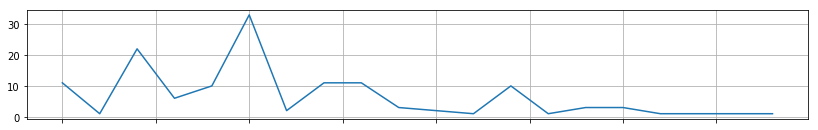

In [1136]:
y.ix[:, 2:].sum().plot(figsize=(14,2), grid=True);

In [1137]:
from scipy import sparse, hstack, vstack

In [1138]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, RidgeClassifierCV, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [1147]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    ngram_range=(1, 2),
    max_features=1200)
word_vectorizer.fit(X)

#train_word = word_vectorizer.transform(X_train)
#test_word = word_vectorizer.transform(X_test)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='char',
    ngram_range=(2, 6),
    max_features=800)
#char_vectorizer.fit(X)

#train_char = char_vectorizer.transform(X_train)
#test_char = char_vectorizer.transform(X_test)

In [1154]:
from sklearn.pipeline import FeatureUnion

vectorizer = FeatureUnion(
    [
        ('word_vectorizer',  word_vectorizer
        ),

        ('char_vectorizer', char_vectorizer
        )
 ])

vectorizer.fit(X_train)
X_feats = vectorizer.transform(X)
X_feats.shape

(176, 2000)

In [1155]:
from sklearn.decomposition import TruncatedSVD, PCA
tf_svd = TruncatedSVD(n_components=100, algorithm="arpack", random_state=42).fit_transform(X_feats) 
tf_svd.shape

(176, 100)

In [1156]:
from sklearn.preprocessing import normalize

def series_to_csr(wmd_series):
    wmds = list(wmd_series)
    wmd_np_array = np.array([np.array(each, dtype=np.float64) for each in wmds])
    wmd_sparse = sparse.csr_matrix(wmd_np_array)
    return wmd_sparse

wmd_features = normalize(series_to_csr(wmd), axis=0)
# wmd_features = normalize(series_to_csr(X["wmd"]), axis=1)

In [1172]:
full_features = sparse.hstack([tf_svd, wmd_features])
full_features

<176x110 sparse matrix of type '<class 'numpy.float64'>'
	with 19360 stored elements in COOrdinate format>

In [1173]:
X_train, X_test, y_train, y_test = train_test_split(full_features, y, test_size=0.33, random_state=42)

In [1159]:
logreg = LogisticRegression(penalty="l2", C=10)
clf = OneVsRestClassifier(logreg)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 3 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 13 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 15 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 18 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 19 is present in all training examples.
  str(classes[c]))
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarni

(0.5084745762711864, 0.5539951448241984)

# Baseline models

In [1160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

In [1179]:
y.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [1190]:
from skmultilearn.adapt import MLkNN
classifier = MLkNN(k=1)
predictions = classifier.fit(X_train, y_train.values).predict(X_test)
accuracy_score(y_test, predictions, normalize=True), f1_score(y_test, predictions, average="weighted")

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.5932203389830508, 0.574223792080935)

In [1193]:
MLkNN?

In [1197]:
k_range = np.arange(1, 20)
s = [0.05, 0.1, 0.5, 1, 1.5, 2, 3]
ignore_first_neighbours = [True, False]
param_grid = dict(k=k_range, s=s, ignore_first_neighbours=ignore_first_neighbours)

grid_search_clf(MLkNN(), param_grid, scoring="accuracy")

(0.75, {'ignore_first_neighbours': False, 'k': 1, 's': 0.05})

In [1195]:
def grid_search_clf(clf, params, scoring):
    grid = GridSearchCV(clf, params, cv=5, scoring=scoring) 
    grid.fit(full_features, y.values)
    return grid.best_score_, grid.best_params_

In [1162]:
clf = KNeighborsClassifier()

k_range = np.arange(1,10)
weight_options = ["uniform", "distance"]
metrics = ['minkowski','euclidean','manhattan']

param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metrics)

grid_search_clf(clf, param_grid, "accuracy")

(0.75, {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'})

In [1073]:
from xgboost import XGBClassifier
#params are from the above mentioned tutorial
xgb_params={
    'objective': 'multi:softprob',
    'eta': 0.1,
    'max_depth': 3,
    'silent' :1,
    'num_class' : 3,
    'eval_metric' : "mlogloss",
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.3,
    'seed':17,
    'num_rounds':2000,
}

In [1164]:
clf = KNeighborsClassifier(n_neighbors=1, weights="uniform", metric="minkowski")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [1165]:
from sklearn.metrics import f1_score, average_precision_score, accuracy_score
f1_score(y_test, y_pred, average="weighted")

/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tonko22/.virtualenvs/semantic_env_36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.574223792080935

In [1166]:
accuracy_score(y_test, y_pred)

0.5932203389830508

In [1021]:
def evaluate(clf, test_features, y_test, proba=False):
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")

def score_one_vs_rest(input_clf, proba=False):
    clf = OneVsRestClassifier(input_clf)
    clf.fit(train_features, y_train)
    evaluate(clf, test_features, y_test)
    if proba:
        y_pred = clf.predict_proba(test_features)
    else:
        y_pred = clf.predict(test_features)
    return accuracy_score(y_test, y_pred, normalize=True), f1_score(y_test, y_pred, average="weighted")